<a href="https://colab.research.google.com/github/vermansh16/cat-dog-classification-using-cnn/blob/main/cat_dog_classification_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:06<00:00, 291MB/s]
100% 1.06G/1.06G [00:06<00:00, 187MB/s]


In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [4]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
# generators-------->
train_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/train',
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

test_ds= keras.utils.image_dataset_from_directory(
    directory= '/content/test',
    labels= 'inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# normalise ----->
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

train_ds= train_ds.map(process)
validation_ds=test_ds.map(process)


In [7]:
# cnn model ----->
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history= model.fit(train_ds,epochs=10,validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 83s 109ms/step - loss: 1.5166 - accuracy: 0.5615 - val_loss: 0.7310 - val_accuracy: 0.5974
Epoch 2/10
625/625 [==============================] - 66s 105ms/step - loss: 0.6531 - accuracy: 0.6170 - val_loss: 0.6224 - val_accuracy: 0.6332
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5755 - accuracy: 0.6945 - val_loss: 0.5762 - val_accuracy: 0.6912
Epoch 4/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4883 - accuracy: 0.7574 - val_loss: 0.5134 - val_accuracy: 0.7612
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4255 - accuracy: 0.7971 - val_loss: 0.4540 - val_accuracy: 0.7802
Epoch 6/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3658 - accuracy: 0.8294 - val_loss: 0.5964 - val_accuracy: 0.7560
Epoch 7/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3100 - accuracy: 0.8559 - val_loss: 0.5964 - val_ac

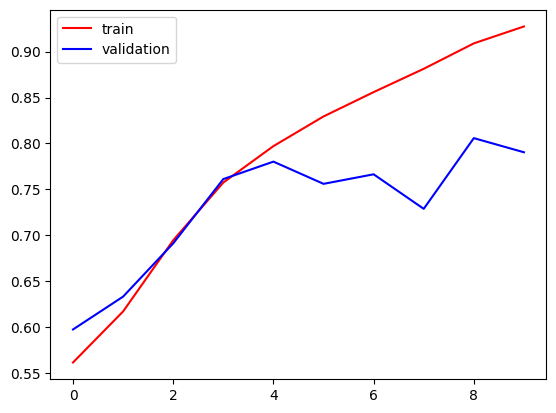

In [11]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


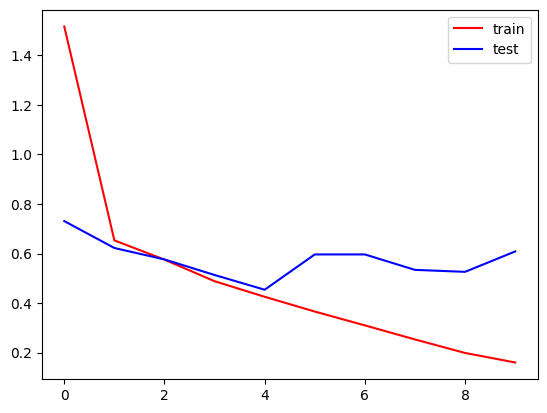

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.legend()
plt.show()

In [13]:
# in training loss is reducing with epochs increasing but in test it is increasing
# =====> overfitting

# ways to reduce overfitting ->

#   add more data
#   data augmentation
#   l1/l2 regularizer
#   dropout
#   batch norm
#   reduce complexity

In [14]:
import cv2

In [15]:
test_img=cv2.imread('/content/dog.jpeg')


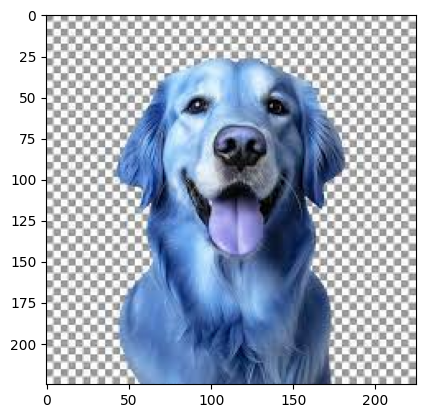

In [16]:
plt.imshow(test_img)

In [17]:
test_img.shape

(225, 225, 3)

In [18]:
test_img=cv2.resize(test_img,(256,256))

In [19]:
test_input=test_img.reshape((1,256,256,3))
#we store it in 4d tensor like in batch there is a one img of size 256,256,3

In [20]:
 model.predict(test_input)

1/1 [==============================] - 0s 289ms/step


array([[1.]], dtype=float32)

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

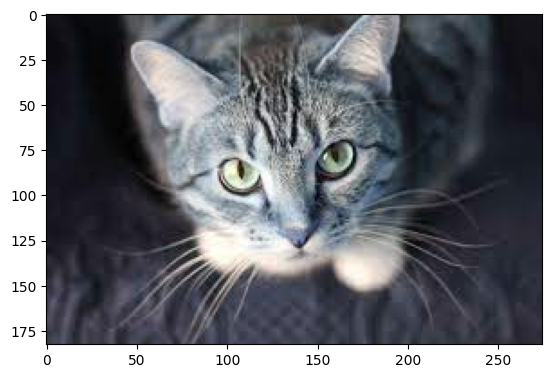

In [21]:
test_img2 =cv2.imread('/content/catty2.jpeg')
plt.imshow(test_img2)
test_img2.shape
test_img2=cv2.resize(test_img2,(256,256))
test_input2=test_img2.reshape((1,256,256,3))
model.predict(test_input2)

# New section